## Webscraping example 2: KAREN MILLEN website

In [1]:
%matplotlib inline

In [2]:
# Some importing 
import time
import numpy as np
import pandas as pd
from selenium import webdriver
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

The URL we are trying to scrape is http://www.karenmillen.com/gb/womens/new-in/clothing/

In [3]:
URL = 'http://www.karenmillen.com/gb/womens/new-in/clothing/'

## The problem with dynamic websites

Dynamic websites contain Web pages that are generated in real-time. These pages include Web scripting code, such as Javascript, PHP or ASP. When a dynamic page is accessed, the code within the page is parsed on the Web server and the resulting HTML is sent to the client's Web browser.

Because of a simpler scraper retrieve the content of a webpage as it is, it just not work well in this case. 

To overcome this, we can use Selenium, a toolkit to simulate a browser a drive it from your favorite programming language. 

You can download any (firefox/chrome/Edge) webdriver from these websites. We need the driver because selenium uses the web browser to scrape the data from the websites.

https://sites.google.com/a/chromium.org/chromedriver/downloads

https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/

https://github.com/mozilla/geckodriver/releases


Next step is put this driver executable in $PATH variable so it can be used from anywhere. To do so execute this command in terminal,

For MAC/Linux user,

```shell
"export PATH=$PATH:path/to/webdriver" >> $HOME/.bash_profile
```

Now, the first step is to load the webdriver which we downloaded before. I will be using chrome webdriver for this example but you can use the same procedure for other web drivers.

In [14]:
# Selenium Chrome driver
driver = webdriver.Chrome()

In [15]:
# Open the URL
driver.get(URL)

In [12]:
# Close the driver
driver.close()

### Using Selenium to overcome the scroolling

In [16]:
def scroll_down():
    script = "window.scrollTo(0, document.body.scrollHeight); return document.body.scrollHeight;"
    len_page = driver.execute_script(script)
    while True:
        last_count = len_page
        print('lenOfPage %d' % len_page)
        time.sleep(5)
        len_page = driver.execute_script(script)
        if last_count == len_page:
            break
    return

In [17]:
scroll_down()

lenOfPage 2810
lenOfPage 4795
lenOfPage 6793
lenOfPage 8769
lenOfPage 10745
lenOfPage 12743
lenOfPage 14741
lenOfPage 16739
lenOfPage 18265


## Getting the products details in the page

In [19]:
def get_product(el):
    product = dict()

    name = el.find_element_by_xpath(".//a[@class='name-link']")
    if name:
        product['name'] = name.text
    else:
        product['name'] = ''

    price = el.find_element_by_xpath(".//div[@class='product-price']")
    if price:
        product['price'] = float(price.text.replace("£", "").replace(",", ""))
    else:
        product['price'] = np.nan

    return product

In [20]:
def get_elements():
    return driver.find_elements_by_xpath(".//div[@class='name-price-wrapper']")

In [23]:
items = get_elements()
items

[<selenium.webdriver.remote.webelement.WebElement (session="234fefffb1daf768ca92af128f9330d6", element="0.9946675079520271-1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="234fefffb1daf768ca92af128f9330d6", element="0.9946675079520271-2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="234fefffb1daf768ca92af128f9330d6", element="0.9946675079520271-3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="234fefffb1daf768ca92af128f9330d6", element="0.9946675079520271-4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="234fefffb1daf768ca92af128f9330d6", element="0.9946675079520271-5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="234fefffb1daf768ca92af128f9330d6", element="0.9946675079520271-6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="234fefffb1daf768ca92af128f9330d6", element="0.9946675079520271-7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="234fefffb1daf768ca92af128f9330d6", el

In [25]:
get_product(items[0])

{'name': 'FAUX FUR WRAP-AROUND COAT', 'price': 399.0}

## Putting all together

In [26]:
def get_data(URL):
    # Open the url
    driver.get(URL)
    time.sleep(5)

    # Scroll page until end
    scroll_down()

    # Get all list of items
    items = get_elements()

    # Extract information for each item in the items list
    products = []
    for item in items:
        products.append(get_product(item))

    return products

In [34]:
driver = webdriver.Chrome()

In [35]:
p = get_data(URL)

lenOfPage 2810
lenOfPage 4795
lenOfPage 6793
lenOfPage 8769
lenOfPage 10745
lenOfPage 12743
lenOfPage 14741
lenOfPage 16739
lenOfPage 18265


## Putting the data in a dataframe

In [36]:
df = pd.DataFrame(p)
df.head()

,name,price
0,FAUX FUR WRAP-AROUND COAT,399.0
1,TAILORED CULOTTE JUMPSUIT,235.0
2,ITALIAN WOOL MIX COAT,350.0
3,WOOL RICH TRENCH COAT,350.0
4,GEO-PRINT A-LINE KNIT DRESS,140.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
name     105 non-null object
price    105 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [38]:
df.price.describe()

count     105.000000
mean      216.171429
std       192.015948
min        55.000000
25%       110.000000
50%       145.000000
75%       250.000000
max      1400.000000
Name: price, dtype: float64

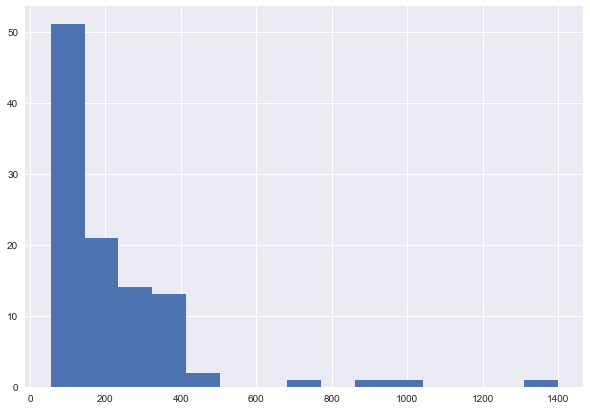

In [32]:
df.price.hist(bins=15, figsize=(10,7))

## Closing the driver

In [39]:
driver.close()